In [1]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train.shape[0]

60000

input data에 존재하는 이미지의 shape 변경 <br> (28x28) => (28x28x1)<br>

In [6]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
x_train[0].shape

(28, 28, 1)

In [9]:
x_train = x_train.astype('float32')/255 # 0 ~ 1 사이의 값으로 normalization
x_test = x_test.astype('float32')/255

In [10]:
y_train[0]

5

In [11]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [12]:
print(y_train[0])
y_train_one_hot[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# 2D 필터의 움직임이 2D(가로 세로) # 1D는 한 방향으로만 움직인다.

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# strides=(1, 1)

Conv2D :  https://keras.io/layers/convolutional/  
          https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
<br> 참고

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# strides의 기본값 => pool_size

2x2 크기의 filter를 사용해서 Max pooling 수행

In [18]:
model.add(Flatten())

Flatten(): 3차원 형태의 데이터를 1차원 형태로 변경

In [19]:
model.add(Dense(128, activation='relu'))

In [20]:
model.add(Dense(num_classes, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [22]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10


375/375 [==============================] - 17s 6ms/step - loss: 0.2381 - accuracy: 0.9276 - val_loss: 0.0921 - val_accuracy: 0.9735
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0720 - accuracy: 0.9785 - val_loss: 0.0664 - val_accuracy: 0.9813
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0623 - val_accuracy: 0.9824
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0556 - val_accuracy: 0.9844
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0565 - val_accuracy: 0.9851
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0619 - val_accuracy: 0.9852
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0589 - val_accuracy: 0.9852
Epoch 8/10
375/3

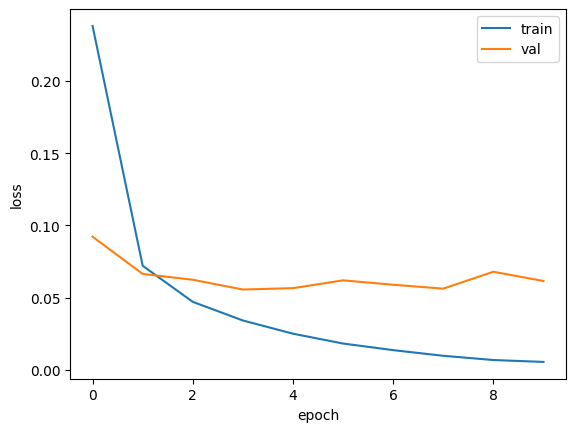

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

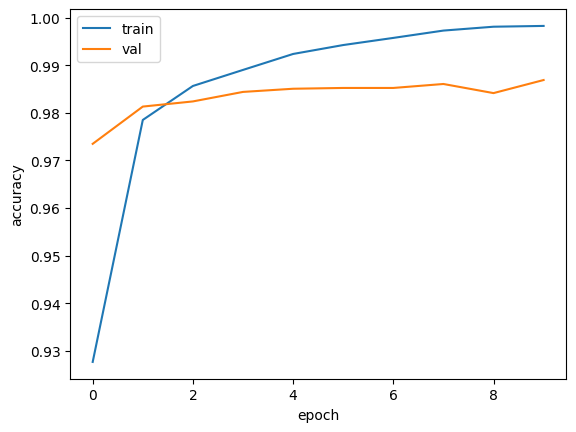

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9873
test_acc: 0.9872999787330627


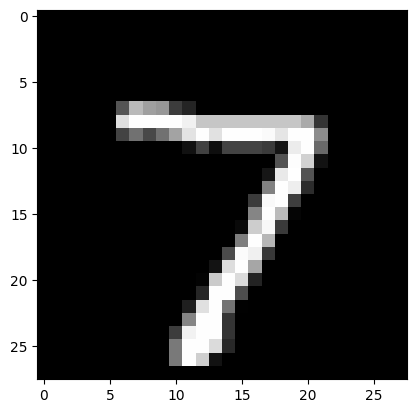

In [27]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [28]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1]) # 첫번째 이미지 in the test dataset

1/1 [==============================] - 0s 146ms/step


In [29]:
prediction

array([[0.          , 0.          , 0.0000000001, 0.0000017231,
        0.          , 0.          , 0.          , 0.99999833  ,
        0.0000000005, 0.0000000021]], dtype=float32)

In [30]:
y_test[0]

7

In [31]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
print(labels[np.argmax(prediction)])

7
